In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [6]:
train = pd.read_csv("train.csv").drop(columns=['id'])
test = pd.read_csv("test.csv").drop(columns=['id'])

target_feature = train.iloc[:,9]
train = train.drop(columns = 'median_house_value')

index = train.index
num_rows = len(index)

index = test.index
test_rows = len(index)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           10320 non-null  float64
 1   latitude            10320 non-null  float64
 2   housing_median_age  10320 non-null  float64
 3   total_rooms         10320 non-null  float64
 4   total_bedrooms      10210 non-null  float64
 5   population          10320 non-null  float64
 6   households          10320 non-null  float64
 7   median_income       10320 non-null  float64
 8   ocean_proximity     10320 non-null  object 
dtypes: float64(8), object(1)
memory usage: 725.8+ KB


In [120]:
train["ocean_proximity"].value_counts()

<1H OCEAN     4566
INLAND        3248
NEAR OCEAN    1329
NEAR BAY      1175
ISLAND           2
Name: ocean_proximity, dtype: int64

In [121]:
train = pd.get_dummies(data = train, columns = ['ocean_proximity'])
test = pd.get_dummies(data = test, columns = ['ocean_proximity'])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   10320 non-null  float64
 1   latitude                    10320 non-null  float64
 2   housing_median_age          10320 non-null  float64
 3   total_rooms                 10320 non-null  float64
 4   total_bedrooms              10210 non-null  float64
 5   population                  10320 non-null  float64
 6   households                  10320 non-null  float64
 7   median_income               10320 non-null  float64
 8   ocean_proximity_<1H OCEAN   10320 non-null  uint8  
 9   ocean_proximity_INLAND      10320 non-null  uint8  
 10  ocean_proximity_ISLAND      10320 non-null  uint8  
 11  ocean_proximity_NEAR BAY    10320 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  10320 non-null  uint8  
dtypes: float64(8), uint8(5)
memory 

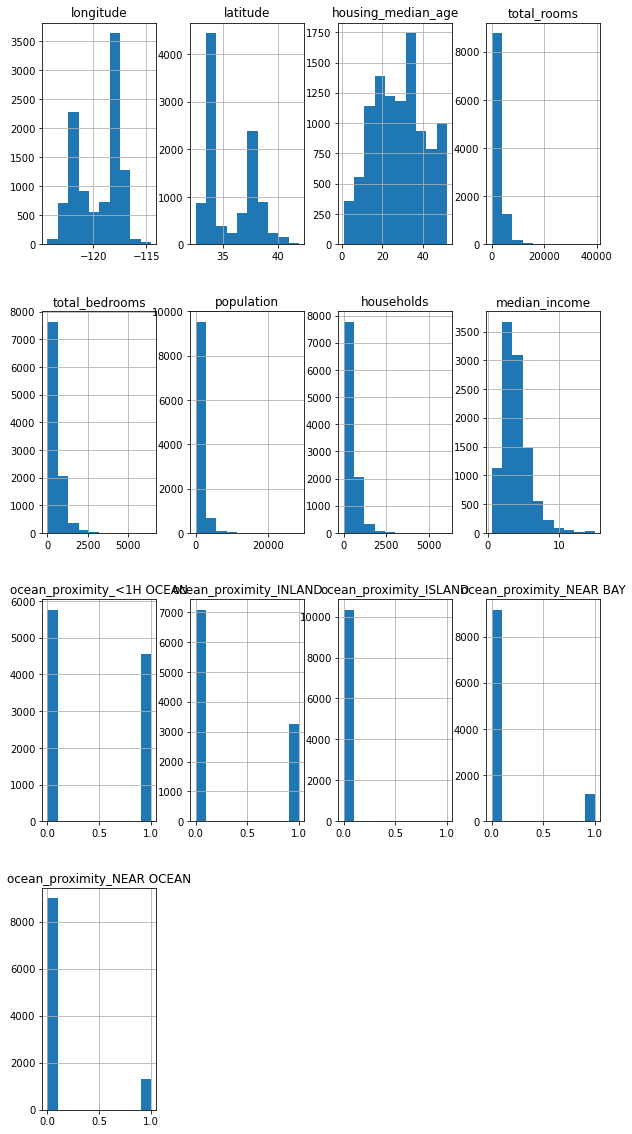

In [122]:
train.hist(figsize=(10,20))
plt.show()

In [123]:
train.isna().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                110
population                      0
households                      0
median_income                   0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [124]:
test.isna().sum()

longitude                      0
latitude                       0
housing_median_age             0
total_rooms                    0
total_bedrooms                97
population                     0
households                     0
median_income                  0
ocean_proximity_<1H OCEAN      0
ocean_proximity_INLAND         0
ocean_proximity_ISLAND         0
ocean_proximity_NEAR BAY       0
ocean_proximity_NEAR OCEAN     0
dtype: int64

In [125]:
median = train.iloc[:,4].median()
print(median)
train = train.fillna({"total_bedrooms": median})
median = test.iloc[:,4].median()
print(median)
test = test.fillna({"total_bedrooms": median})

438.0
431.0


In [126]:
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 10: 
            out.append(i)
    print("Outliers:",out)
            
column_counter = 0
    
for column in train:
    out=[]
    Zscore_outlier(train.iloc[:,column_counter])
    median = train.iloc[:,column_counter].median()
    for x in range(num_rows):
        if(train.iloc[x,column_counter] in out):
            train.iloc[x,column_counter] = median#Replace outliers with median 
    column_counter+=1
    
column_counter = 0
    
for column in test:
    out=[]
    Zscore_outlier(test.iloc[:,column_counter])
    median = test.iloc[:,column_counter].median()
    for x in range(test_rows):
        if(test.iloc[x,column_counter] in out):
            test.iloc[x,column_counter] = median#Replace outliers with median 
    column_counter+=1


Outliers: []
Outliers: []
Outliers: []
Outliers: [27700.0, 30405.0, 25187.0, 39320.0, 25957.0, 27870.0, 32627.0]
Outliers: [6210.0, 4798.0, 5027.0, 6445.0]
Outliers: [15037.0, 12873.0, 16305.0, 28566.0]
Outliers: [5358.0, 4490.0, 4855.0, 6082.0]
Outliers: []
Outliers: []
Outliers: []
Outliers: [1, 1]
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: []
Outliers: [25135.0, 30450.0, 30401.0, 26322.0, 28258.0, 37937.0, 32054.0, 24121.0]
Outliers: [4819.0, 5033.0, 4957.0, 4952.0, 5471.0, 5290.0, 5419.0]
Outliers: [35682.0, 13251.0, 16122.0, 15507.0]
Outliers: [4769.0, 4339.0, 4616.0, 5189.0, 5050.0, 4930.0]
Outliers: []
Outliers: []
Outliers: []
Outliers: [1, 1, 1]
Outliers: []
Outliers: []


In [127]:
X_train, X_test, y_train, y_test = train_test_split(train, target_feature, test_size = 0.2, random_state=42) 

In [128]:
model = LinearRegression()
  
model.fit(X_train, y_train) 

pred = model.predict(X_test)

In [129]:
RMSE = np.sqrt(mean_squared_error(y_test, pred))
print(RMSE)

67874.6952612414


In [130]:
pipe = Pipeline([('los', LinearRegression())], verbose = True)

model_2 = pipe.fit(X_train,y_train)

pred = model_2.predict(X_test)

MSE = np.sqrt(mean_squared_error(y_test, pred))
print(RMSE)

[Pipeline] ............... (step 1 of 1) Processing los, total=   0.0s
67874.6952612414


In [131]:
pred = model_2.predict(test)

ouput = pd.DataFrame(data = pred,columns = ["median_house_value"])
ouput.to_csv('output.csv',index_label = 'id')

In [132]:
print(pred)

[162101.03187785 251803.01165    152173.07312163 ... 228933.70673658
 295764.52363184 196752.52656749]
